In [1]:
import pandas as pd
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
pima = pd.read_csv('pima-indians-diabetes.csv', header=None, names = col_names)

In [2]:
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
feature_cols = ['pregnant', 'insulin', 'bmi','age']
X = pima[feature_cols]
y = pima.label

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)

In [8]:
from sklearn.linear_model import LogisticRegression
logReg = LogisticRegression()
logReg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [9]:
y_pred_class = logReg.predict(X_test)

In [10]:
from sklearn import metrics
print metrics.accuracy_score(y_test, y_pred_class)

0.692708333333


In [11]:
y_test.value_counts()

0    130
1     62
Name: label, dtype: int64

In [12]:
y_test.mean()

0.32291666666666669

In [13]:
#dumb model
1-y_test.mean()

0.67708333333333326

In [15]:
print 'True', y_test.values[0:25]
print 'Pred', y_pred_class[0:25]

True [1 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 0 0]
Pred [0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [17]:
print metrics.confusion_matrix(y_test, y_pred_class)

[[118  12]
 [ 47  15]]


In [18]:
confusion = metrics.confusion_matrix(y_test, y_pred_class)
TP = confusion[1,1]
TN = confusion[0,0]
FP = confusion[0,1]
FN = confusion[1,0]

In [23]:
print metrics.recall_score(y_test, y_pred_class)

0.241935483871


In [24]:
print metrics.precision_score(y_test, y_pred_class)

0.555555555556


In [25]:
logReg.predict(X_test)[0:10]

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1])

In [30]:
y_pred_prob=logReg.predict_proba(X_test)[:, 1]

In [31]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 14

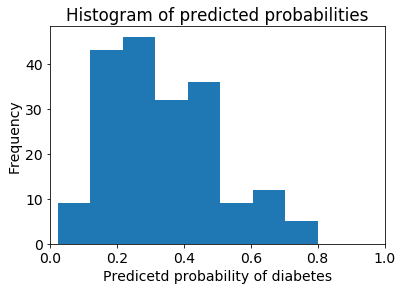

In [34]:
plt.hist(y_pred_prob, bins = 8)
plt.xlim(0,1)
plt.title('Histogram of predicted probabilities')
plt.xlabel('Predicetd probability of diabetes')
plt.ylabel('Frequency')

In [37]:
from sklearn.preprocessing import binarize
y_pred_class = binarize([y_pred_prob], 0.3)[0]

In [38]:
y_pred_prob[0:10]

array([ 0.36752429,  0.28356344,  0.28895886,  0.4141062 ,  0.15896027,
        0.17065156,  0.49889026,  0.51341541,  0.27678612,  0.67189438])

In [39]:
y_pred_class[0:10]

array([ 1.,  0.,  0.,  1.,  0.,  0.,  1.,  1.,  0.,  1.])

In [40]:
print confusion

[[118  12]
 [ 47  15]]


In [41]:
print metrics.confusion_matrix(y_test, y_pred_class)

[[80 50]
 [16 46]]


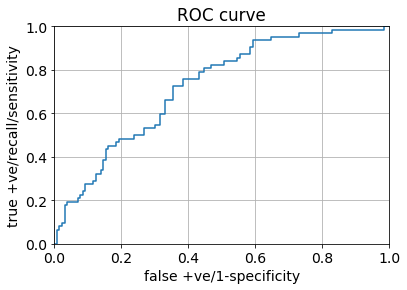

In [45]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve')
plt.xlabel('false +ve/1-specificity')
plt.ylabel('true +ve/recall/sensitivity')
plt.grid(True)

In [46]:
def evaluate_threshold(threshold):
    print 'Sensitivity: ',tpr[thresholds >  threshold][-1]
    print 'Specificity: ',1- fpr[thresholds > threshold][-1]

In [50]:
evaluate_threshold(0.5)

 Sensitivity:  0.241935483871
Specificity:  0.907692307692
